In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
 
import matplotlib.pyplot as plt
import seaborn as sns
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
 
# Warnings
import warnings
warnings.filterwarnings('ignore')
 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data.csv',encoding="ISO-8859-1")
df.fillna(0, inplace=True)
data = df.loc[df['location'] == 'Delhi']
data.tail()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
74407,531,16-12-15,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",4.0,56.0,246.0,0.0,"Pritampura, Delhi",0.0,2015-12-16
74408,531,21-12-15,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",4.0,54.0,269.0,0.0,"Pritampura, Delhi",0.0,2015-12-21
74409,531,28-12-15,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",4.0,53.0,205.0,0.0,"Pritampura, Delhi",0.0,2015-12-28
74410,531,29-12-15,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",5.0,43.0,142.0,0.0,"Pritampura, Delhi",0.0,2015-12-29
74411,531,31-12-15,Delhi,Delhi,Central Pollution Control Board,"Residential, Rural and other Areas",9.0,44.0,420.0,0.0,"Pritampura, Delhi",0.0,2015-12-31


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Function to calculate so2 individual pollutant index(si)
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['so2'].apply(calculate_si)
df= data[['so2','si']]

In [ ]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['no2'].apply(calculate_ni)
df= data[['no2','ni']]

In [ ]:
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['rspm'].apply(calculate_si)
df= data[['rspm','rpi']]


In [ ]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['spm'].apply(calculate_spi)
df= data[['spm','spi']]

In [ ]:
#function to calculate the air quality index (AQI) of every data value
#its is calculated as per indian govt standards
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)
df= data[['sampling_date','state','si','ni','rpi','spi','AQI']]
df.head()

,sampling_date,state,si,ni,rpi,spi,AQI
65861,9/1/1987,Delhi,10.750,20.250,0.0,273.00,273.00
65862,9/2/1987,Delhi,8.125,11.625,0.0,472.50,472.50
65863,9/3/1987,Delhi,32.250,13.000,0.0,471.25,471.25
65864,9/3/1987,Delhi,0.625,3.500,0.0,522.50,522.50
65865,9/2/1987,Delhi,3.125,16.000,0.0,495.00,495.00


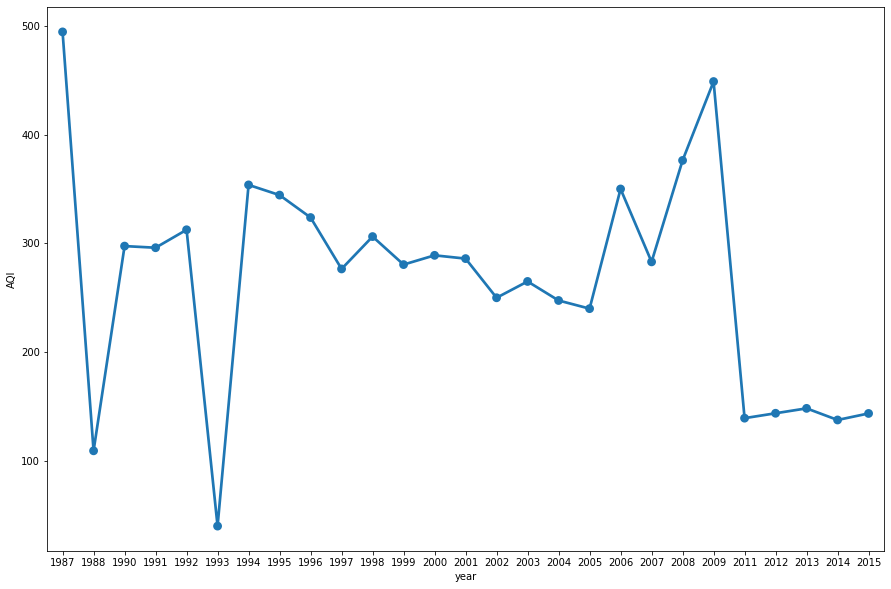

In [ ]:
data['date'] = pd.to_datetime(data['date'],format='%Y-%m-%d') # date parse
data['year'] = data['date'].dt.year # year
data['year'] = data['year'].fillna(0.0).astype(int)
data = data[(data['year']>0)]

df = data[['AQI','year','state']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
f,ax=plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='AQI', data=df)

In [ ]:
import warnings
import itertools
import dateutil
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
df=data[['AQI','date']]
df["date"] = pd.to_datetime(df['date'])
df.tail(20)

,AQI,date
74392,141.333333,2015-10-07
74393,143.333333,2015-10-12
74394,151.333333,2015-10-15
74395,205.875000,2015-10-20
74396,203.875000,2015-10-26
74397,208.750000,2015-10-29
74398,127.000000,2015-11-05
74399,184.666667,2015-11-09
74400,215.500000,2015-11-13
74401,193.333333,2015-11-18


In [ ]:
df=df.set_index('date').resample('M')["AQI"].mean()
df.head()

date
1987-01-31    576.312500
1987-02-28    508.125000
1987-03-31    581.111111
1987-04-30    287.000000
1987-05-31           NaN
Freq: M, Name: AQI, dtype: float64

In [ ]:
#preprocessing the data values
data=df.reset_index(level=0, inplace=False)
data = data[np.isfinite(data['AQI'])]
data=data[data.date != '1970-01-31']
data = data.reset_index(drop=True)
data.head()


,date,AQI
0,1987-01-31,576.312500
1,1987-02-28,508.125000
2,1987-03-31,581.111111
3,1987-04-30,287.000000
4,1988-01-31,118.310185


In [ ]:
df=data.set_index('date')
df.sort_values(by='date',ascending=False)

,AQI
date,
2015-12-31,178.137626
2015-11-30,176.847222
2015-10-31,157.169399
2015-09-30,128.894531
2015-08-31,115.005208
...,...
1988-01-31,118.310185
1987-04-30,287.000000
1987-03-31,581.111111


In [ ]:
df=data[['AQI','date']]

df['date']=pd.to_datetime(df['date'])
date=df.groupby(pd.Grouper(key='date',freq='1MS'))["AQI"].mean()

In [ ]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data=data[['AQI','date','month','year']]


In [ ]:
data=data[data['month']==1]

In [ ]:
df = data[['AQI','year']].groupby(["year"]).mean().reset_index().sort_values(by='year',ascending=False)
df=df.dropna()
dd=df
df.describe()

,year,AQI
count,27.000000,27.000000
mean,2001.111111,302.514324
std,8.331282,126.807273
min,1987.000000,33.291667
25%,1994.500000,217.637722
50%,2001.000000,299.564815
75%,2007.500000,389.408905
max,2015.000000,576.312500


In [ ]:
df['AQI']=pd.to_numeric(df['AQI'],errors='coerce')
df['year']=pd.to_numeric(df['year'],errors='coerce')

In [ ]:
cols =['year']
y = df['AQI']
x=df[cols]


In [ ]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.        ,  1.66707707],
       [ 1.        ,  1.54704753],
       [ 1.        ,  1.42701798],
       [ 1.        ,  1.30698843],
       [ 1.        ,  1.18695888],
       [ 1.        ,  0.94689978],
       [ 1.        ,  0.82687023],
       [ 1.        ,  0.70684068],
       [ 1.        ,  0.58681113],
       [ 1.        ,  0.46678158],
       [ 1.        ,  0.34675203],
       [ 1.        ,  0.22672248],
       [ 1.        ,  0.10669293],
       [ 1.        , -0.01333662],
       [ 1.        , -0.13336617],
       [ 1.        , -0.25339572],
       [ 1.        , -0.37342526],
       [ 1.        , -0.49345481],
       [ 1.        , -0.61348436],
       [ 1.        , -0.73351391],
       [ 1.        , -0.85354346],
       [ 1.        , -0.97357301],
       [ 1.        , -1.09360256],
       [ 1.        , -1.21363211],
       [ 1.        , -1.33366166],
       [ 1.        , -1.57372076],
       [ 1.        , -1.69375031]])

In [ ]:
# Applying GRADIENT DESCENT 
 
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking random values to start with
 
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]
 
#Printing the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 302.51, -35.84


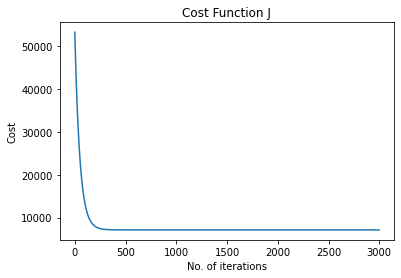

In [ ]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [ ]:
newB=[ 302.51, -35.84]
def rmse(y,y_pred):
    rmse=np.sqrt(sum(y-y_pred))
    return rmse

   
y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
x=pd.concat([df, dt], axis=1)

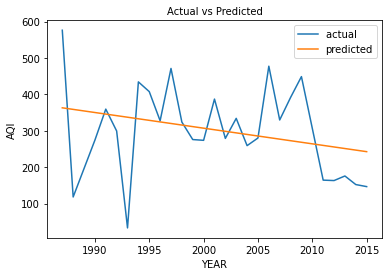

In [ ]:
x_axis=x.year
y_axis=x.Actual
y1_axis=x.Predicted
plt.plot(x_axis,y_axis)
plt.plot(x_axis,y1_axis)
plt.title("Actual vs Predicted",fontsize=10)
plt.legend(["actual ","predicted"])
plt.xlabel("YEAR",fontsize=10)
plt.ylabel("AQI",fontsize=10)
plt.tick_params(labelsize=10)
plt.show()

In [ ]:
x

,year,AQI,Actual,Predicted
11,2015,63.959596,63.959596,73.895559
10,2014,70.470657,70.470657,79.070912
9,2013,97.416667,97.416667,84.246265
8,2012,60.412286,60.412286,89.421618
7,2011,76.930233,76.930233,94.596971
6,2010,137.656463,137.656463,99.772324
5,2009,133.511905,133.511905,104.947676
4,2008,116.470238,116.470238,110.123029
3,2007,115.049242,115.049242,115.298382
2,2006,141.247549,141.247549,120.473735


In [ ]:
import numpy as np

In [ ]:
a = np.random.rand(2)

In [ ]:
a


array([0.91962151, 0.88378558])